In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import gc

from datetime import datetime

sns.set(style='whitegrid')

pd.set_option('display.max_columns', None)  

%matplotlib inline

In [3]:
# To force some binary varibles to be read as str
dtypes = \
{
    'school_year_round': str,
    'projectid': str,
    'teacher_acctid': str,                                                                              
    'school_metro': str,                                          
    'school_charter': str,                                        
    'school_magnet': str,                                                                            
    'school_nlns': str,                                            
    'school_kipp': str,                                           
    'school_charter_ready_promise': str,                           
    'teacher_prefix': str,                                        
    'teacher_teach_for_america': str,                              
    'teacher_ny_teaching_fellow': str,                                                                
    'eligible_double_your_impact_match': str,                      
    'eligible_almost_home_match': str,                                                                                                             
    'is_exciting': str,                                          
}

In [5]:
df = pd.read_csv('../Data/Kaggle/KDDCup14/data_consolidation.csv', dtype=dtypes)

In [6]:
df.shape

(664098, 81)

In [7]:
df.columns

Index(['projectid', 'teacher_acctid', 'school_latitude', 'school_longitude',
       'school_metro', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area',
       'resource_type', 'poverty_level', 'grade_level',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'date_posted', 'qtd_projects', 'is_exciting', 'mean_is_exciting',
       'mean_at_least_1_teacher_referred_donor', 'mean_fully_funded',
       'mean_at_least_1_green_donation', 'mean_great_chat',
       'mean_one_non_teacher_referred_donor_giving_100_plus',
       'mean_donation_from_thoughtf

In [8]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df = df[(df['date_posted'].dt.year > 2009) & (df['date_posted'].dt.year < 2014)]

len(df)

439599

In [9]:
df['date_posted'].min()

Timestamp('2010-01-01 00:00:00')

In [10]:
df['date_posted'].max()

Timestamp('2013-12-31 00:00:00')

### Análise Geral

#### Missing Values

In [11]:
def plotNull(df, exclude='object'):
    df = df.select_dtypes(exclude=exclude)
    df_null = df.isnull().sum() / len(df)
    df_null.sort_values(inplace=True)
    df_null.plot.barh(figsize=(10, 15), xlim=(0,1), 
                      title='Percentual of "Missing Values" (%)')

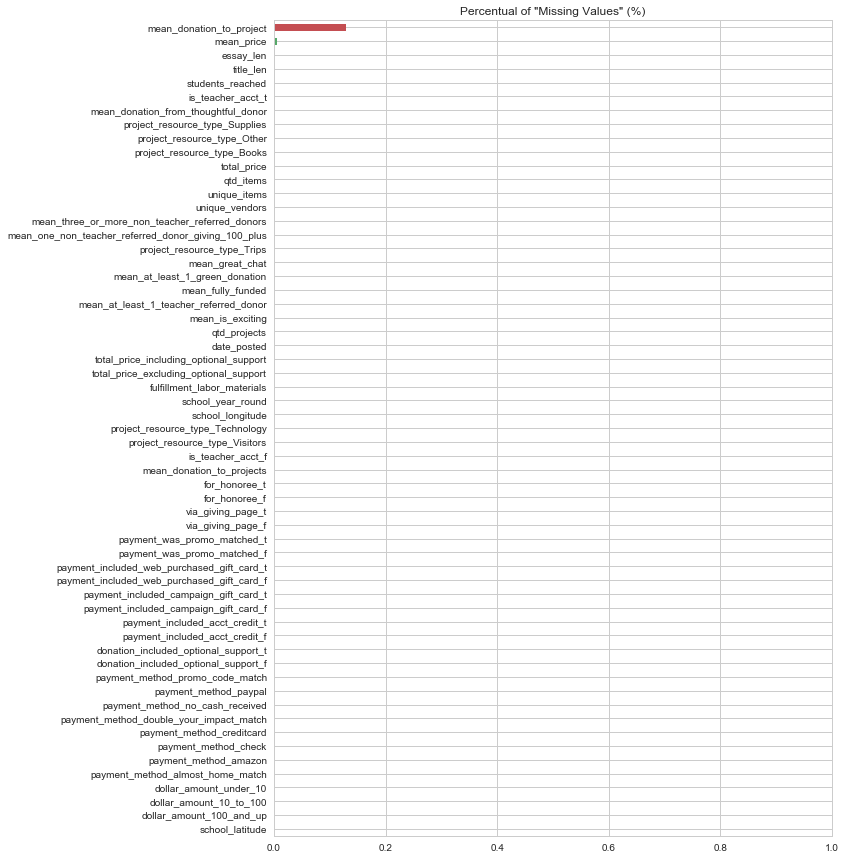

In [12]:
plotNull(df)

#### Target

In [13]:
df['is_exciting'].value_counts()

0.0    402889
1.0     36710
Name: is_exciting, dtype: int64

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


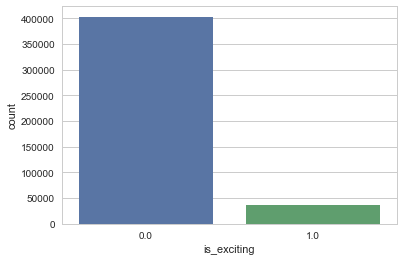

In [14]:
sns.countplot(x='is_exciting', data=df)

### Time Analysis

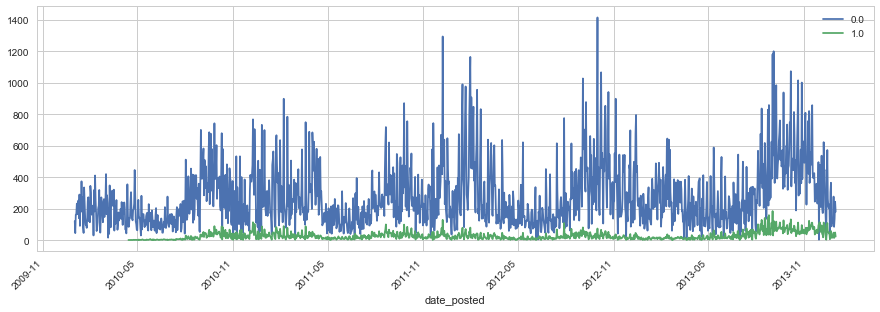

In [15]:
plt.figure(figsize=(15, 5))

for key, grp in df.groupby(['is_exciting']): 
    grp.groupby('date_posted')['projectid'].size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

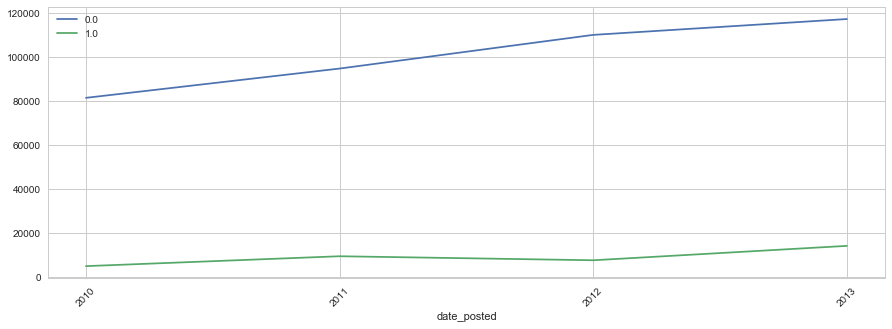

In [16]:
plt.figure(figsize=(15, 5))

per = df['date_posted'].dt.to_period("Y")
for key, grp in df.groupby(['is_exciting']): 
    grp.groupby(per).size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

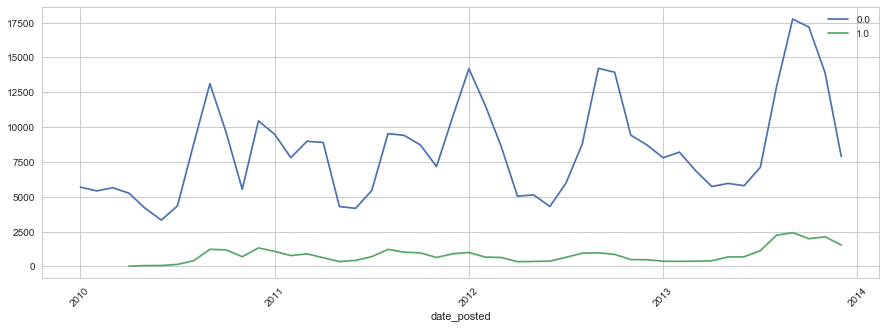

In [17]:
plt.figure(figsize=(15, 5))

per = df['date_posted'].dt.to_period("M")
for key, grp in df.groupby(['is_exciting']): 
    grp.groupby(per).size().plot(figsize=(15, 5), rot=45, kind='line', label=key)
plt.legend();

### Distributions

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


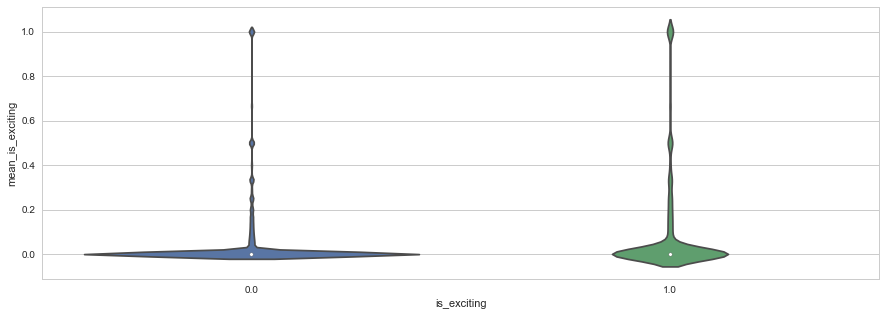

In [18]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_is_exciting', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


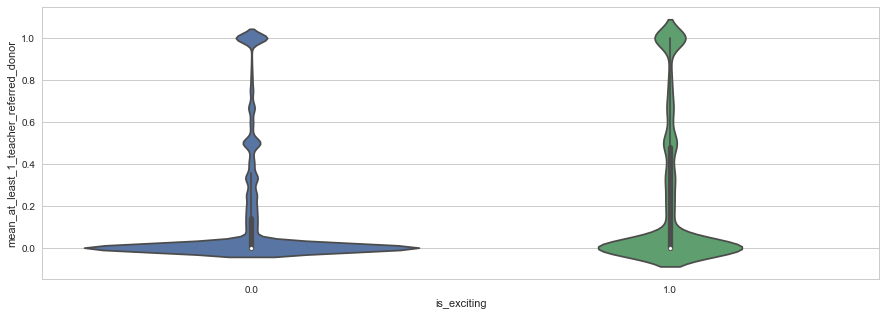

In [19]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_at_least_1_teacher_referred_donor', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


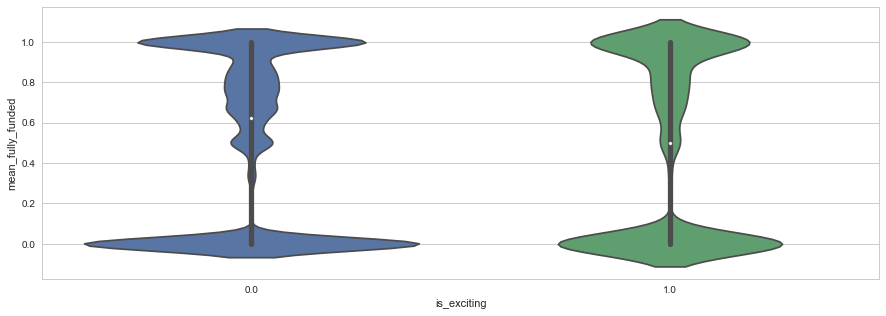

In [20]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_fully_funded', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


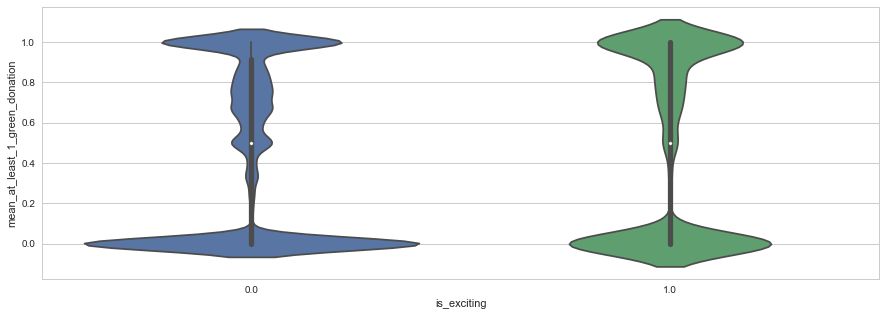

In [21]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_at_least_1_green_donation', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


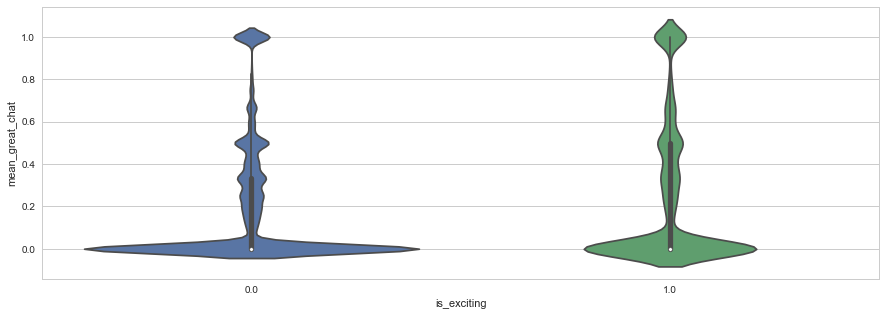

In [22]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_great_chat', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


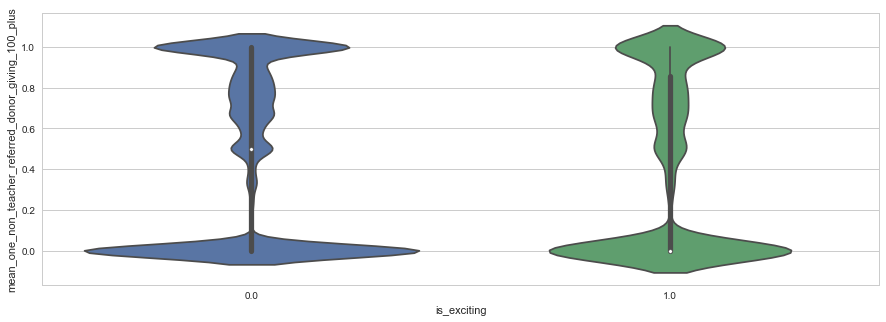

In [23]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_one_non_teacher_referred_donor_giving_100_plus', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


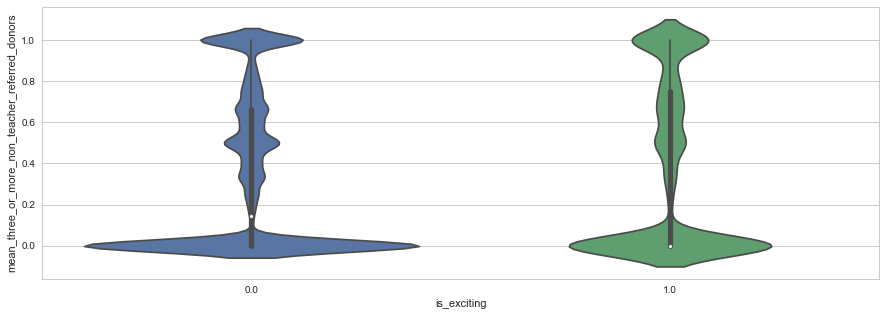

In [24]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_three_or_more_non_teacher_referred_donors', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


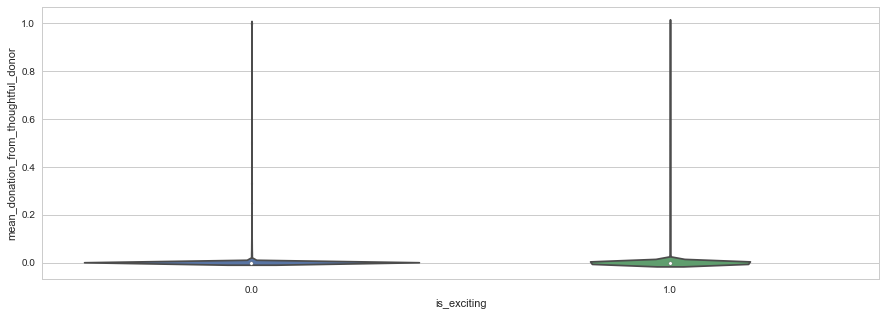

In [25]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_donation_from_thoughtful_donor', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


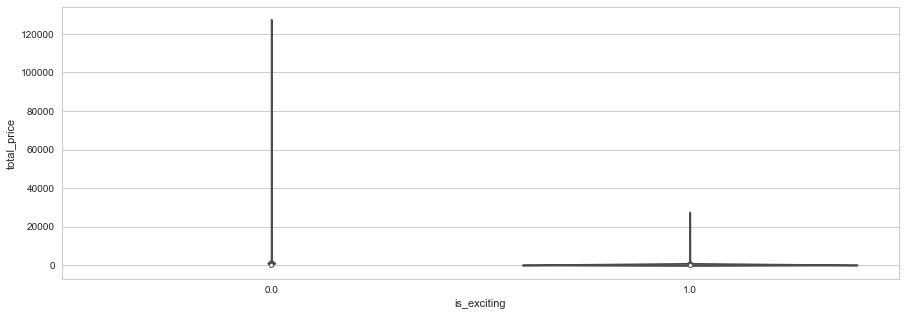

In [26]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='total_price', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


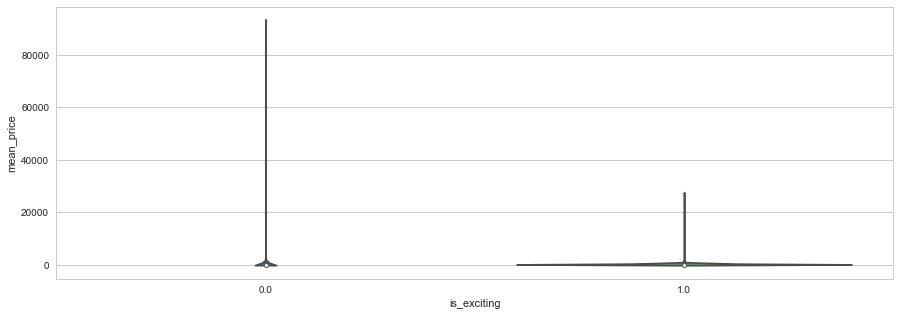

In [27]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_price', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


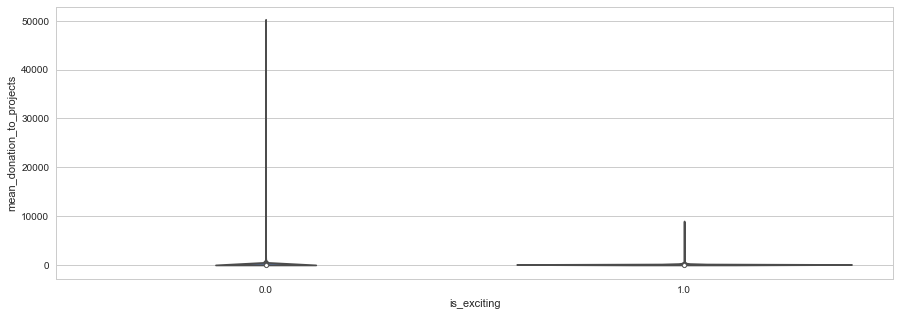

In [28]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_donation_to_projects', x='is_exciting', data=df)

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


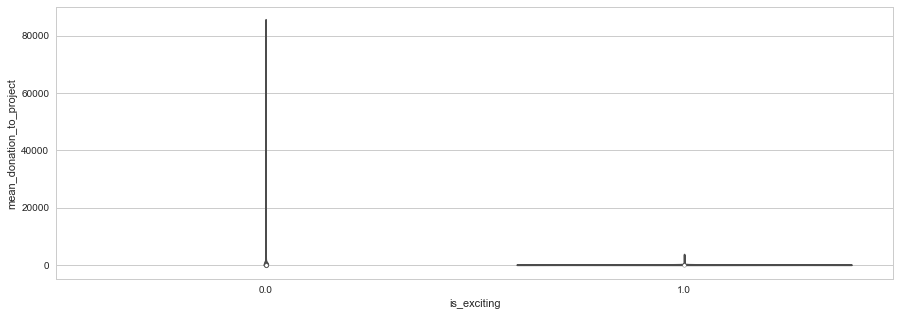

In [29]:
plt.figure(figsize=(15, 5))
sns.violinplot(y='mean_donation_to_project', x='is_exciting', data=df)

### Correlation

In [31]:
numerical = df.select_dtypes(include=[np.number]).drop(['ID_BD', 'Y', 'VISIT_COUNTS', 'NUM_BA', 'CONCENTRACAO'], axis=1)
numerical.columns

Index(['school_latitude', 'school_longitude', 'school_year_round',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'qtd_projects', 'mean_is_exciting',
       'mean_at_least_1_teacher_referred_donor', 'mean_fully_funded',
       'mean_at_least_1_green_donation', 'mean_great_chat',
       'mean_one_non_teacher_referred_donor_giving_100_plus',
       'mean_donation_from_thoughtful_donor',
       'mean_three_or_more_non_teacher_referred_donors', 'title_len',
       'essay_len', 'unique_vendors', 'unique_items', 'qtd_items',
       'total_price', 'mean_price', 'project_resource_type_Books',
       'project_resource_type_Other', 'project_resource_type_Supplies',
       'project_resource_type_Technology', 'project_resource_type_Trips',
       'project_resource_type_Visitors', 'mean_donation_to_projects',
       'mean_donation_to_project', 'dollar_amount_100_and_up',
       'dollar_amoun

In [31]:
corr =.drop(['ID_BD', 'Y', 'VISIT_COUNTS', 'NUM_BA', 'CONCENTRACAO'], axis=1).corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .7}, annot=True, annot_kws={"size": 10}, fmt='.2f');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439599 entries, 44772 to 484370
Data columns (total 81 columns):
projectid                                              439599 non-null object
teacher_acctid                                         439599 non-null object
school_latitude                                        439599 non-null float64
school_longitude                                       439599 non-null float64
school_metro                                           385565 non-null object
school_charter                                         439599 non-null int64
school_magnet                                          439599 non-null int64
school_year_round                                      439599 non-null int64
school_nlns                                            439599 non-null int64
school_kipp                                            439599 non-null int64
school_charter_ready_promise                           439599 non-null int64
teacher_prefix                 